<a href="https://colab.research.google.com/github/coder-penguin/ML/blob/master/tutorial/keras_tutorial_binaryclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sample code for binary classification with NN

Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model, model_to_dot
from IPython.display import SVG

print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


2.2.0-rc2


In [2]:
#check GPU
tf.test.gpu_device_name()

'/device:GPU:0'

Read data

In [0]:
# read the breast cancer wisconsin dataset
dataset = load_breast_cancer()

In [4]:
#30 features
dataset['data'].shape

(569, 30)

In [5]:
#binary target
dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
dataset['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [7]:
dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

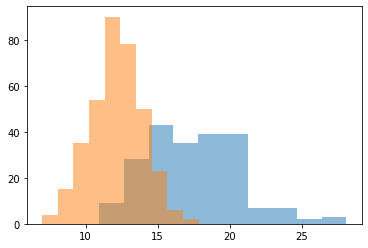

In [8]:
# show data
plt.hist(dataset['data'][:, 0][dataset['target']==0], label=dataset['target_names'][0], alpha=0.5)
plt.hist(dataset['data'][:, 0][dataset['target']==1], label=dataset['target_names'][1], alpha=0.5)
plt.show()

In [0]:
# image(numpy.ndarray)
X = dataset.data

# label(numpy.ndarray)
y = dataset.target

In [0]:
#split dataset to train and test dataset
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True)#default is True

In [11]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

455 114
455 114


In [0]:
df = pd.DataFrame(data=X_train, columns=dataset.feature_names)

In [0]:
df['target'] = y_train

In [14]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,14.34,13.47,92.51,641.2,0.09906,0.07624,0.05724,0.046030,0.2075,0.05448,0.5220,0.8121,3.763,48.290,0.007089,0.01428,0.02360,0.012860,0.02266,0.001463,16.77,16.90,110.40,873.2,0.12970,0.1525,0.1632,0.10870,0.3062,0.06072,1
1,20.55,20.86,137.80,1308.0,0.10460,0.17390,0.20850,0.132200,0.2127,0.06251,0.6986,0.9901,4.706,87.780,0.004578,0.02616,0.04005,0.014210,0.01948,0.002689,24.30,25.48,160.20,1809.0,0.12680,0.3135,0.4433,0.21480,0.3077,0.07569,0
2,11.32,27.08,71.76,395.7,0.06883,0.03813,0.01633,0.003125,0.1869,0.05628,0.1210,0.8927,1.059,8.605,0.003653,0.01647,0.01633,0.003125,0.01537,0.002052,12.08,33.75,79.82,452.3,0.09203,0.1432,0.1089,0.02083,0.2849,0.07087,1
3,14.90,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.097110,0.2041,0.06898,0.2530,0.8749,3.466,24.190,0.006965,0.06213,0.07926,0.022340,0.01499,0.005784,16.35,27.57,125.40,832.7,0.14190,0.7090,0.9019,0.24750,0.2866,0.11550,0
4,17.27,25.42,112.40,928.8,0.08331,0.11090,0.12040,0.057360,0.1467,0.05407,0.5100,1.6790,3.283,58.380,0.008109,0.04308,0.04942,0.017420,0.01594,0.003739,20.38,35.46,132.80,1284.0,0.14360,0.4122,0.5036,0.17390,0.2500,0.07944,0


In [15]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.010701,19.222835,91.118681,642.005055,0.096348,0.102511,0.087130,0.047667,0.180062,0.062801,0.393110,1.190535,2.773288,38.952607,0.007010,0.024911,0.031726,0.011546,0.020342,0.003744,16.140218,25.594747,106.342088,864.316923,0.132794,0.253216,0.272450,0.113675,0.289763,0.084156,0.632967
std,3.388838,4.308776,23.265495,336.943992,0.014175,0.050754,0.077689,0.037413,0.027542,0.006979,0.273735,0.546918,1.961061,46.449921,0.003037,0.017738,0.031752,0.006065,0.007882,0.002618,4.666932,6.207201,32.303967,547.306304,0.022730,0.156689,0.208275,0.064701,0.061824,0.018504,0.482526
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.023440,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.003012,0.000000,0.000000,0.009539,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210,0.000000
25%,11.710000,16.190000,75.235000,420.750000,0.086010,0.063100,0.028540,0.019485,0.160800,0.057805,0.231250,0.822500,1.594000,17.775000,0.005213,0.012535,0.014570,0.007490,0.014995,0.002214,13.020000,21.005000,84.135000,515.850000,0.117650,0.144100,0.112100,0.063155,0.250100,0.071835,0.000000
50%,13.210000,18.770000,85.630000,538.900000,0.095920,0.090090,0.059290,0.032750,0.178200,0.061610,0.316000,1.077000,2.279000,24.250000,0.006399,0.020030,0.025440,0.010670,0.018680,0.003107,14.840000,25.220000,97.190000,677.300000,0.132400,0.214100,0.229900,0.098510,0.282300,0.079990,1.000000
75%,15.515000,21.595000,102.650000,748.050000,0.105300,0.130350,0.130000,0.073820,0.195300,0.066100,0.459000,1.433500,3.215000,44.180000,0.008039,0.031790,0.040110,0.014380,0.023360,0.004449,18.180000,29.445000,123.500000,1023.000000,0.146200,0.340750,0.385300,0.161350,0.317450,0.092100,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.286700,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.061460,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1dfc601c50>,
      dtype=object)

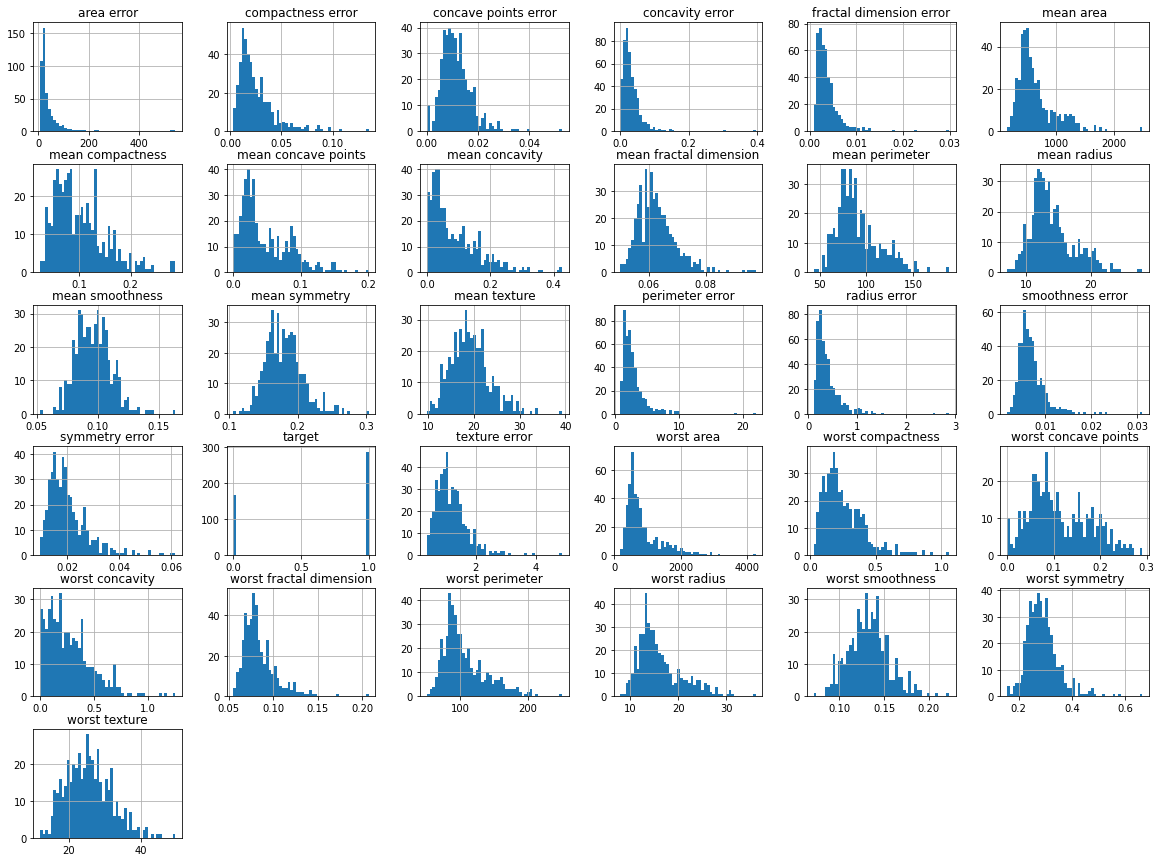

In [16]:
# show data
df.hist(bins=50, figsize=(20,15))

In [0]:
#standard correlation coefficient
corr_mx = df.corr()

In [18]:
corr_mx['target'].sort_values(ascending=False)

target                     1.000000
smoothness error           0.057437
texture error              0.042387
symmetry error             0.031374
mean fractal dimension    -0.000475
fractal dimension error   -0.067846
concavity error           -0.212792
compactness error         -0.273392
worst fractal dimension   -0.328876
mean symmetry             -0.349430
mean smoothness           -0.373530
concave points error      -0.382253
mean texture              -0.405077
worst symmetry            -0.440194
worst smoothness          -0.446160
worst texture             -0.447434
area error                -0.506526
perimeter error           -0.522607
radius error              -0.532848
worst compactness         -0.592559
mean compactness          -0.598864
worst concavity           -0.645982
mean concavity            -0.685723
mean area                 -0.701308
mean radius               -0.723984
worst area                -0.732832
mean perimeter            -0.738152
worst radius              -0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1df4e49f98>,
      dtype=object)

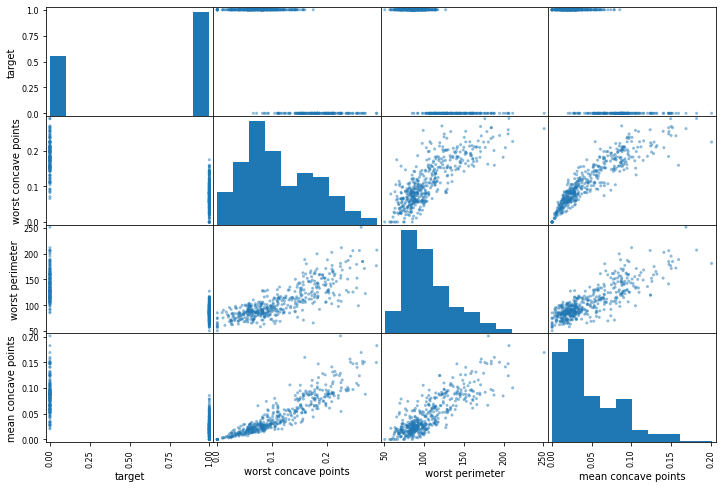

In [19]:
attributes = ['target', 'worst concave points', 'worst perimeter', 'mean concave points']
pd.plotting.scatter_matrix(df[attributes], figsize=(12, 8))

In [0]:
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)

###Train model

In [0]:
def build_model():
  activation = 'elu'
  model = Sequential([
    Dropout(0.2, input_shape=(30,)),
    Dense(64),
    BatchNormalization(),
    Activation(activation),
    Dropout(0.5),
    Dense(32, activation=activation),
    Dense(1, activation='sigmoid')
  ], name='my_model')

  #compile
  loss = 'binary_crossentropy'
  optimizer = SGD(lr=0.005, nesterov=True)
  model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

  return model

In [0]:
model = build_model()

In [23]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1984      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33 

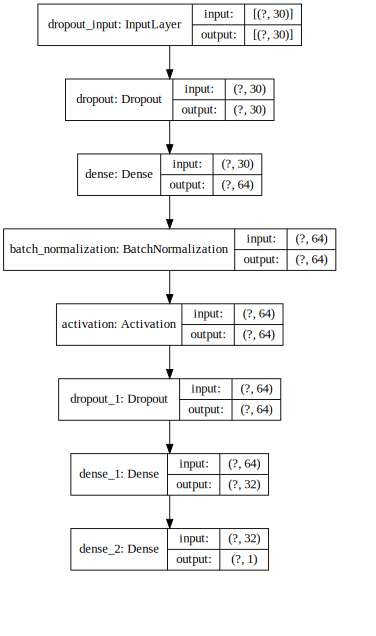

In [24]:
#show model
SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

In [25]:
!mkdir log

mkdir: cannot create directory ‘log’: File exists


In [0]:
callbacks = [#EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True), #stop training if there is no improvement
                   ModelCheckpoint('./log/model_{epoch:03d}_{val_loss:.4f}.h5', save_best_only=True) #save models
                   ]

In [27]:
history = model.fit(X_train_processed, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=callbacks)

Epoch 1/100
13/13 [==============================] - 0s 17ms/step - loss: 0.7990 - accuracy: 0.5183 - val_loss: 0.5391 - val_accuracy: 0.8261
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5955 - accuracy: 0.6846 - val_loss: 0.4343 - val_accuracy: 0.8696
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5201 - accuracy: 0.7384 - val_loss: 0.3692 - val_accuracy: 0.8913
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4284 - accuracy: 0.8044 - val_loss: 0.3273 - val_accuracy: 0.8913
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4072 - accuracy: 0.8386 - val_loss: 0.2992 - val_accuracy: 0.9130
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4088 - accuracy: 0.8264 - val_loss: 0.2745 - val_accuracy: 0.9348
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3656 - accuracy: 0.8509 - val_loss: 0.2553 - val_accuracy: 0.9348
Epoch 8/100


In [0]:
def plot_loss_and_accuracy(history):
  plt.figure(figsize=(12, 4))
  plt.subplot(121)
  plt.plot(history.epoch, history.history["accuracy"], label="train_accuracy")
  plt.plot(history.epoch, history.history["val_accuracy"], label="val_accuracy")
  plt.xlabel("epoch")
  plt.legend()

  plt.subplot(122)
  plt.plot(history.epoch, history.history["loss"], label="train_loss")
  plt.plot(history.epoch, history.history["val_loss"], label="val_loss")
  plt.xlabel("epoch")
  plt.legend()

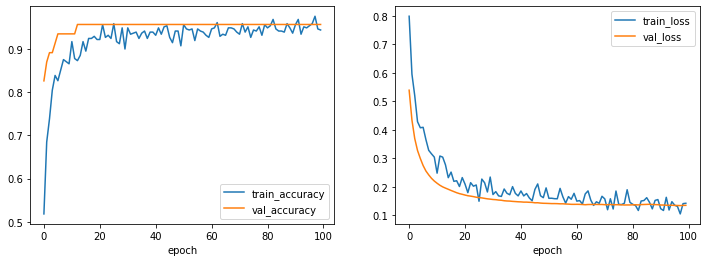

In [29]:
plot_loss_and_accuracy(history)

###Evaluation

k-th cross validation

In [0]:
def cross_validation(X, y, cv=None, epochs=100, batch_size=32):
  kf = KFold(n_splits=cv, shuffle=True)

  y_probas = [0] * len(y)
  accuracy_list = []
  for train_index, val_index in kf.split(X, y):
    train_data = X[train_index]
    train_label = y[train_index]
    val_data = X[val_index]
    val_label = y[val_index]

    model = build_model()
    history = model.fit(train_data, train_label, epochs=epochs, batch_size=batch_size, validation_data=(val_data, val_label))
    val_probas = model.predict(val_data)
    for i, index in enumerate(val_index):
      y_probas[index] = val_probas[i][0]

    plot_loss_and_accuracy(history)

    accuracy = np.max(history.history['val_accuracy'])
    print('accuracy : ', accuracy)
    accuracy_list.append(accuracy)

  print('accuracy : ', np.mean(accuracy_list), ' +- ', np.std(accuracy_list))  

  return y_probas

Epoch 1/100
10/10 [==============================] - 0s 13ms/step - loss: 0.8835 - accuracy: 0.5512 - val_loss: 0.5021 - val_accuracy: 0.7500
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6190 - accuracy: 0.6799 - val_loss: 0.3930 - val_accuracy: 0.8618
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5347 - accuracy: 0.6931 - val_loss: 0.3225 - val_accuracy: 0.9408
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4871 - accuracy: 0.7723 - val_loss: 0.2766 - val_accuracy: 0.9474
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3574 - accuracy: 0.8482 - val_loss: 0.2487 - val_accuracy: 0.9539
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4075 - accuracy: 0.8086 - val_loss: 0.2267 - val_accuracy: 0.9605
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3295 - accuracy: 0.8581 - val_loss: 0.2124 - val_accuracy: 0.9605
Epoch 8/100


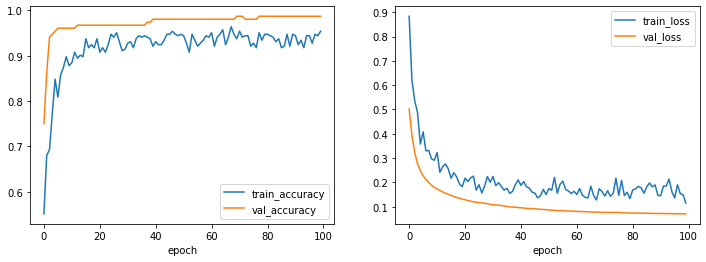

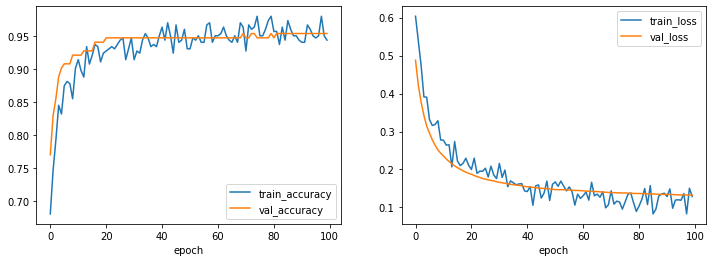

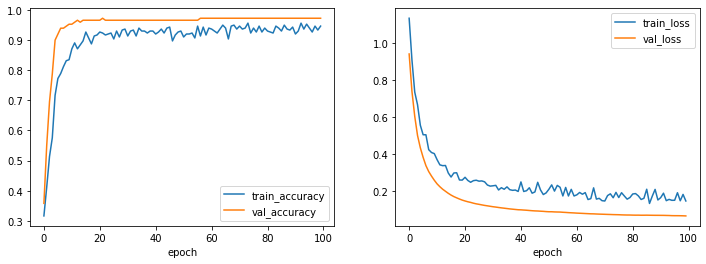

In [31]:
#k-th cross validation
cv = 3 #the number of foldings
y_train_probas = cross_validation(X_train_processed, y_train, cv=cv)

In [0]:
y_train_one = []
y_train_zero = []
for i, x in enumerate(y_train_probas):
  if y_train[i] == 1:
    y_train_one.append(x)
  else :
    y_train_zero.append(x)

(array([109.,  13.,   2.,   7.,   4.,   4.,   1.,   2.,   1.,   3.,   1.,
          2.,   2.,   2.,   1.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.,   0.,   0.,   1.]),
 array([1.5447003e-07, 1.9919798e-02, 3.9839439e-02, 5.9759084e-02,
        7.9678722e-02, 9.9598370e-02, 1.1951801e-01, 1.3943766e-01,
        1.5935729e-01, 1.7927694e-01, 1.9919658e-01, 2.1911623e-01,
        2.3903586e-01, 2.5895551e-01, 2.7887514e-01, 2.9879481e-01,
        3.1871444e-01, 3.3863407e-01, 3.5855374e-01, 3.7847337e-01,
        3.9839301e-01, 4.1831264e-01, 4.3823230e-01, 4.5815194e-01,
        4.7807157e-01, 4.9799123e-01, 5.1791084e-01, 5.3783053e-01,
        5.5775017e-01, 5.7766980e-01, 5.9758943e-01, 6.1750907e-01,
        6.3742870e-01, 6.5734833e-01, 6.7726803e-01, 6.9718766e-01,
        7.1710730e-01, 7.3702693e-01, 7.569465

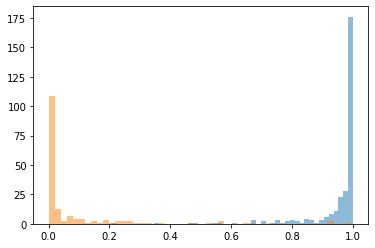

In [33]:
plt.hist(y_train_one, bins=50, alpha=0.5)
plt.hist(y_train_zero, bins=50, alpha=0.5)

confusion matrix

In [0]:
#calculate confusion matrix
#y_train_pred = cross_val_predict(model, X_train, y_train, cv=cv)
threshold = 0.5
y_train_pred = [y_train_probas[i]>threshold for i in range(len(y_train_probas))]
conf_mx = confusion_matrix(y_train, y_train_pred)

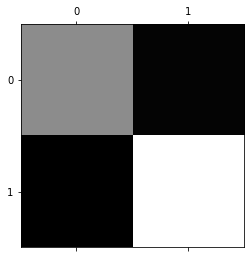

In [35]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

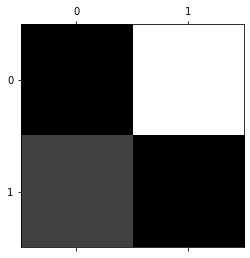

In [36]:
#convert to error probability
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
#set diagonal to 0 for visibility
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

various scores

In [37]:
accuracy_score(y_train, y_train_pred)

0.9714285714285714

In [38]:
precision_score(y_train, y_train_pred)

0.9692832764505119

In [39]:
recall_score(y_train, y_train_pred)

0.9861111111111112

In [40]:
f1_score(y_train, y_train_pred)

0.9776247848537005

In [41]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       167
           1       0.97      0.99      0.98       288

    accuracy                           0.97       455
   macro avg       0.97      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455



In [0]:
y_train_scores = y_train_probas

In [0]:
def plot_pr_curve(y, y_score, label=None):

    fpr, tpr, thresholds = precision_recall_curve(y, y_score)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [1, 0], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    return

No handles with labels found to put in legend.


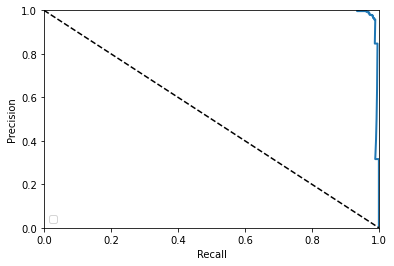

In [44]:
plot_pr_curve(y_train, y_train_scores)
plt.show()

In [0]:
def plot_roc_curve(y, y_score, label=None):

    fpr, tpr, thresholds = roc_curve(y, y_score)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    return

No handles with labels found to put in legend.


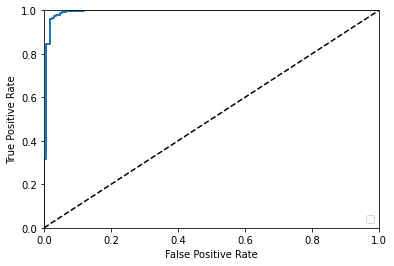

In [46]:
plot_roc_curve(y_train, y_train_scores)
plt.show()

In [47]:
roc_auc_score(y_train, y_train_scores)

0.9928684298070525

###Test

In [48]:
test_loss, test_accuracy = model.evaluate(scaler.transform(X_test), y_test, batch_size=128)

1/1 [==============================] - 0s 1ms/step - loss: 0.0906 - accuracy: 0.9825


In [49]:
print('test loss : ', test_loss, ', accuracy : ', test_accuracy)

test loss :  0.09060074388980865 , accuracy :  0.9824561476707458


In [0]:
y_test_probas = model.predict(scaler.transform(X_test))

In [0]:
threshold = 0.5
y_test_pred = [int(x[0]>threshold) for x in y_test_probas]

In [52]:
print(y_test_pred)

[1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1]


###Save

In [0]:
#save the prediction
submissiondir = '.'
submissionname = 'submission'
pd.DataFrame(data={'target':y_test, 'prediction':y_test_pred}).to_csv(submissiondir + '/' + submissionname + ".csv", index_label=["Id"])

In [0]:
# save the model
filename = 'model.h5'
model.save(filename)

In [55]:
# load the model
loaded_model = load_model(filename)
test_loss, test_accuracy = loaded_model.evaluate(scaler.transform(X_test), y_test, batch_size=128)

1/1 [==============================] - 0s 1ms/step - loss: 0.0906 - accuracy: 0.9825


In [56]:
print('test loss : ', test_loss, ', accuracy : ', test_accuracy)

test loss :  0.09060074388980865 , accuracy :  0.9824561476707458
